In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# Importation des données

In [2]:
billets = pd.read_csv(r'billets.csv', sep=';')
billets

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [3]:
billets.dtypes

is_genuine         bool
diagonal        float64
height_left     float64
height_right    float64
margin_low      float64
margin_up       float64
length          float64
dtype: object

In [4]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [5]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


In [6]:
billets.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

# Matrice de Corrélations 

<AxesSubplot:>

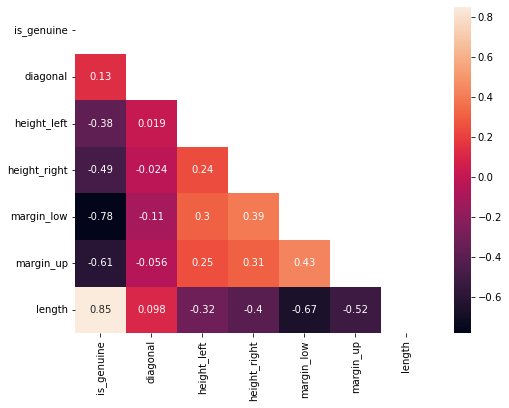

In [7]:
corr_billets = billets.corr()
mask = np.zeros_like(corr_billets, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr_billets[mask] = np.nan
plt.figure(figsize=(8, 6))
sns.heatmap(corr_billets, annot=True)

# Scatterplot de "length" et "margin_low"

In [8]:
# DF avec que des valeurs numériques

billets_num = billets.drop('is_genuine', axis = 1).dropna() ## on supprime les lignes où margin_low est absente
billets_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1463 entries, 0 to 1499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   diagonal      1463 non-null   float64
 1   height_left   1463 non-null   float64
 2   height_right  1463 non-null   float64
 3   margin_low    1463 non-null   float64
 4   margin_up     1463 non-null   float64
 5   length        1463 non-null   float64
dtypes: float64(6)
memory usage: 80.0 KB


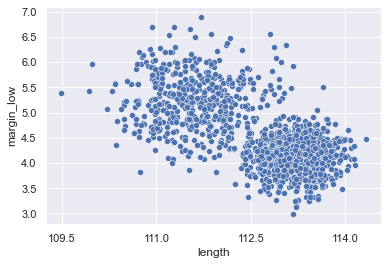

In [9]:
sns.set()

ax = sns.scatterplot(x='length', y='margin_low', data=billets_num)
ax.set(xlabel='length', ylabel='margin_low')
ax.xaxis.set_major_locator(plt.MaxNLocator(5))

# Régression Linéaire Multiple


In [10]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels

In [11]:
df1 = billets.copy()
reg_multi = smf.ols('margin_low ~ is_genuine  + diagonal + height_left + height_right + margin_up + length',
                    data=df1).fit()

In [12]:
print(reg_multi.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          4.75e-299
Time:                        09:05:34   Log-Likelihood:                -774.14
No. Observations:                1463   AIC:                             1562.
Df Residuals:                    1456   BIC:                             1599.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.8668      8

# Régression Linéaire Multiple apres standardisation

In [13]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler()

billets_std = billets.dropna().copy()

dim_billets = ['is_genuine','diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up','length']

billets_std[dim_billets] = std_scale.fit_transform(billets_std[dim_billets])

billets_std.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,0.711825,-0.488594,2.766807,3.173766,0.051286,-1.136982,0.177842
1,0.711825,-1.634809,-2.241490,-0.806851,-1.078937,-0.704806,0.475692
2,0.711825,2.393318,1.498039,-1.300571,-0.129549,-0.920894,0.555882
3,0.711825,-1.962299,-0.405114,0.057159,-1.304982,-0.618370,0.956834
4,0.711825,-0.750586,0.830266,-1.424001,-0.672057,1.412861,-0.154375


In [14]:
model_reg_m_std = smf.ols('margin_low~ is_genuine +diagonal+height_left+height_right+margin_up+length', data=billets_std)

reg_m_std = model_reg_m_std.fit()
print(reg_m_std.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.615
Method:                 Least Squares   F-statistic:                     390.7
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          4.75e-299
Time:                        09:05:35   Log-Likelihood:                -1374.1
No. Observations:                1463   AIC:                             2762.
Df Residuals:                    1456   BIC:                             2799.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     7.182e-16      0.016   4.43e-14   

# Retirez les variables non significatives

In [15]:
model_reg_m_std = smf.ols('margin_low~ is_genuine +diagonal+height_left+height_right+margin_up', data=billets_std)
reg_m_std = model_reg_m_std.fit()
print(reg_m_std.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     469.2
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          2.12e-300
Time:                        09:05:35   Log-Likelihood:                -1374.1
No. Observations:                1463   AIC:                             2760.
Df Residuals:                    1457   BIC:                             2792.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     4.788e-16      0.016   2.95e-14   

In [16]:
model_reg_m_std = smf.ols('margin_low~ is_genuine+height_left+height_right+margin_up', data=billets_std)
reg_m_std = model_reg_m_std.fit()
print(reg_m_std.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     586.8
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          8.76e-302
Time:                        09:05:35   Log-Likelihood:                -1374.2
No. Observations:                1463   AIC:                             2758.
Df Residuals:                    1458   BIC:                             2785.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     5.195e-16      0.016    3.2e-14   

In [17]:
model_reg_m_std = smf.ols('margin_low~ is_genuine+height_left+margin_up', data=billets_std)
reg_m_std = model_reg_m_std.fit()
print(reg_m_std.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     782.5
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          3.63e-303
Time:                        09:05:35   Log-Likelihood:                -1374.4
No. Observations:                1463   AIC:                             2757.
Df Residuals:                    1459   BIC:                             2778.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    5.811e-17      0.016   3.59e-15      

In [18]:
model_reg_m_std = smf.ols('margin_low~ is_genuine+margin_up', data=billets_std)
reg_m_std = model_reg_m_std.fit()
print(reg_m_std.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.617
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     1174.
Date:                Thu, 23 Jun 2022   Prob (F-statistic):          1.24e-304
Time:                        09:05:35   Log-Likelihood:                -1374.7
No. Observations:                1463   AIC:                             2755.
Df Residuals:                    1460   BIC:                             2771.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.712e-16      0.016   2.29e-14      1.0

# Recherche de colinéarité entre les variables

In [19]:
billets_bool = billets.copy()                                      # Create copy of DataFrame
billets_bool['is_genuine'] = billets_bool['is_genuine'].astype(int)                # Transform boolean to integer
billets_bool

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


# Pour détecter la colinéarités nous utilisons le Facteur de la Variance (VIF)
Evalue si les facteurs sont corrélés les un aux autres ( multi-colinéarité).
Si VIF > 10 multi_colinéarité élevé
SI VIF proche de 1 alors pas le modèle n'est pas influencé par la corrélation avec d'autres facteurs

In [20]:
# multicolinéarité
variables = reg_multi.model.exog
VIF = [variance_inflation_factor(variables, i) for i in np.arange(1,variables.shape[1])]
pd.DataFrame(VIF, billets_bool.drop('margin_low', axis=1).columns.tolist()).rename(columns={0:'VIF'})

,VIF
is_genuine,4.725732
diagonal,1.028199
height_left,1.173711
height_right,1.320836
margin_up,1.596090
length,3.613255


# Testez l’homoscédasticité

In [21]:
_, pval, __, f_pval = statsmodels.stats.diagnostic.het_breuschpagan(reg_multi.resid, variables)
print('p value test Breusch Pagan:', pval)

p value test Breusch Pagan: 3.463957971603851e-33


# Testez la normalité des résidus

In [22]:
from scipy.stats import shapiro

In [23]:
shapiro(reg_multi.resid)

ShapiroResult(statistic=0.9936947822570801, pvalue=7.047739472909598e-06)

Text(0.5, 1.0, 'Histogramme des résidus')

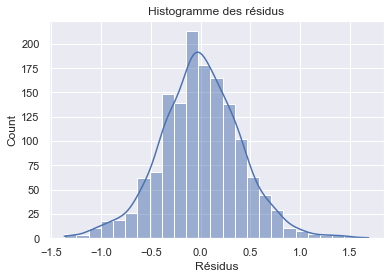

In [24]:
sns.histplot(reg_multi.resid, bins = 25, kde = True)
plt.xlabel('Résidus')
plt.title('Histogramme des résidus')

# Imputation des données manquante 

In [25]:
billets_vf = billets.copy()
billets_vf.loc[billets["margin_low"].isnull(), "margin_low"] = reg_multi.predict(billets_vf)
billets_vf

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,False,171.75,104.38,104.17,4.42,3.09,111.28
1496,False,172.19,104.63,104.44,5.27,3.37,110.97
1497,False,171.80,104.01,104.12,5.51,3.36,111.95
1498,False,172.06,104.28,104.06,5.17,3.46,112.25


In [26]:
billets_vf.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [27]:
#describe
billets_vf.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.482844,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.659899,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.027500,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


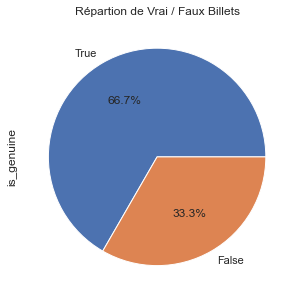

In [28]:
plt.subplots(figsize=(10,5))

billets_vf['is_genuine'].value_counts(normalize=True).plot(kind='pie',autopct='%1.1f%%')

plt.title("Répartion de Vrai / Faux Billets");

# Nombre de Vrai / Faux

In [29]:
billets_vf['is_genuine'].value_counts()

True     1000
False     500
Name: is_genuine, dtype: int64

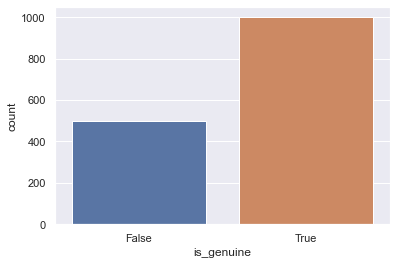

In [30]:
sns.countplot(x='is_genuine', data = billets_vf)
plt.show()

# Moyennes des dimensions

In [31]:
dim_moyennes = billets_vf.groupby('is_genuine').mean()
diff = dim_moyennes.diff().dropna()
dim_moyennes = pd.concat([dim_moyennes, diff])
dim_moyennes.index = ['True', 'False', 'diff des moyennes']
dim_moyennes

,diagonal,height_left,height_right,margin_low,margin_up,length
True,171.90116,104.19034,104.14362,5.216290,3.35016,111.63064
False,171.98708,103.94913,103.80865,4.116122,3.05213,113.20243
diff des moyennes,0.08592,-0.24121,-0.33497,-1.100169,-0.29803,1.57179


# Boxplot Vrai / Faux billets

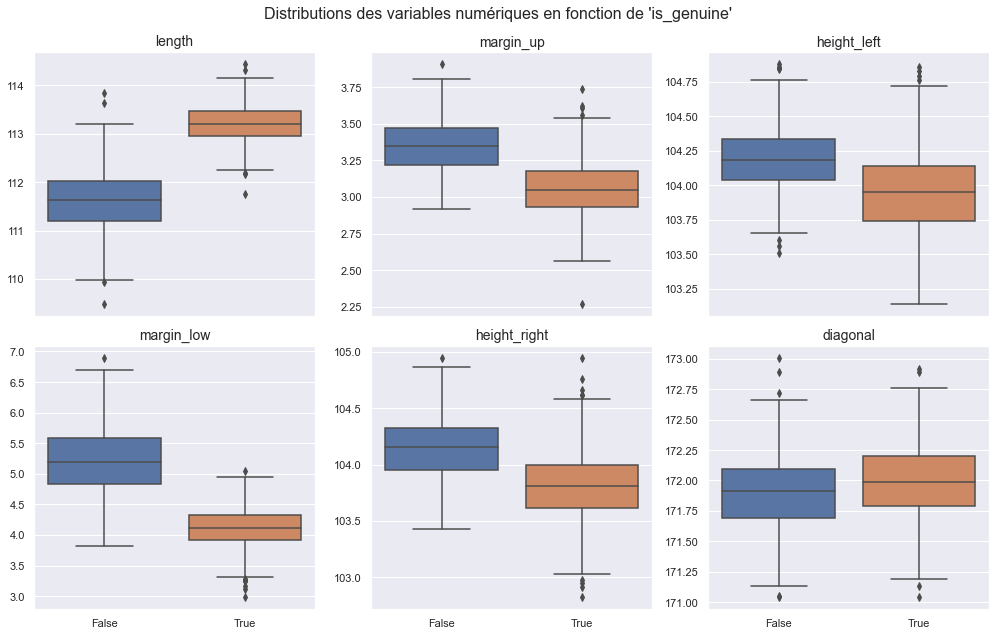

In [32]:
fig, axs = plt.subplots(2,3, sharex = True, sharey = False, figsize = (14,9))
fig.suptitle("Distributions des variables numériques en fonction de 'is_genuine'",
            fontsize = 16)

sns.boxplot(data = billets_vf, x= 'is_genuine', y= 'length', ax=axs[0,0])
axs[0,0].set_title('length', fontsize = 14)
sns.boxplot(data = billets_vf, x= 'is_genuine', y= 'margin_up', ax=axs[0,1])
axs[0,1].set_title('margin_up', fontsize = 14)
sns.boxplot(data = billets_vf, x= 'is_genuine', y= 'margin_low', ax=axs[1,0])
axs[1,0].set_title('margin_low', fontsize = 14)
sns.boxplot(data =billets_vf, x= 'is_genuine', y= 'height_right', ax=axs[1,1])
axs[1,1].set_title('height_right', fontsize = 14)
sns.boxplot(data = billets_vf, x= 'is_genuine', y= 'height_left', ax=axs[0,2])
axs[0,2].set_title('height_left', fontsize = 14)
sns.boxplot(data =billets_vf, x= 'is_genuine', y= 'diagonal',  ax=axs[1,2])
axs[1,2].set_title('diagonal', fontsize = 14)

for ax in axs.flat:
    ax.set_ylabel('')
    ax.set_xlabel('')
    
plt.tight_layout()
plt.show()

# Matrice de corrélation

<AxesSubplot:>

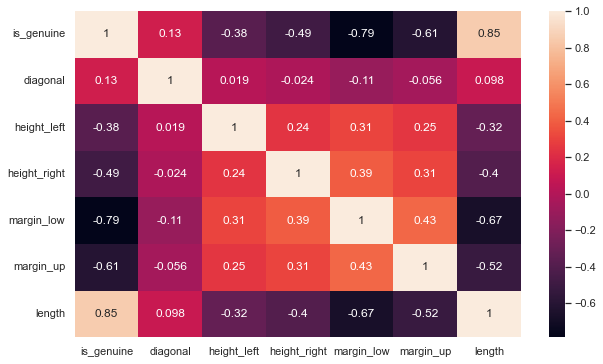

In [33]:
corr_billets = billets_vf.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_billets, annot=True)

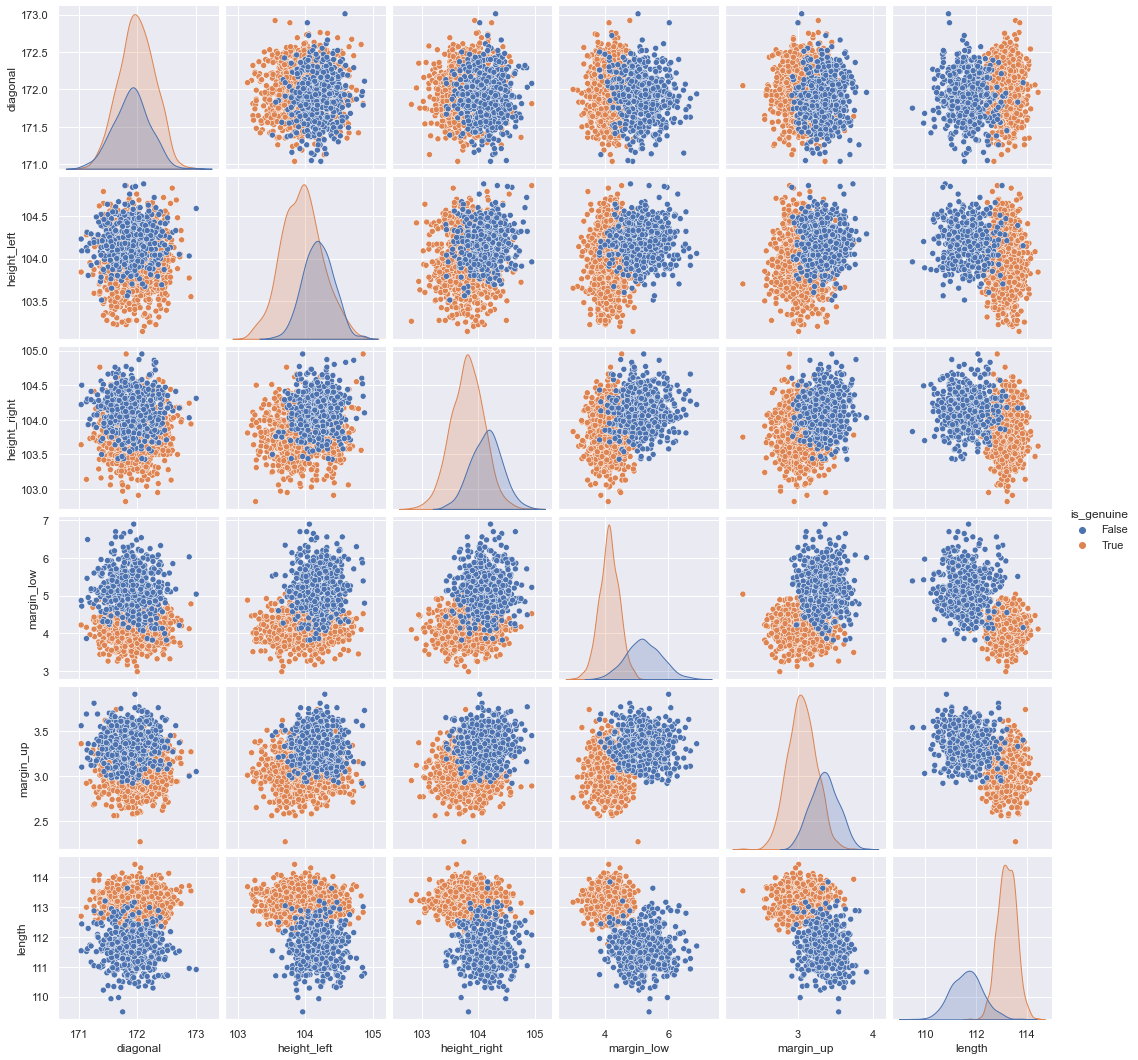

In [34]:
sns.pairplot(billets_vf,hue = 'is_genuine')
plt.show()

# K-Means

In [35]:
from sklearn import preprocessing, metrics, cluster, ensemble
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import decomposition

In [36]:
df_kmeans = billets_vf.copy()
X = df_kmeans.drop("is_genuine", axis=1).values

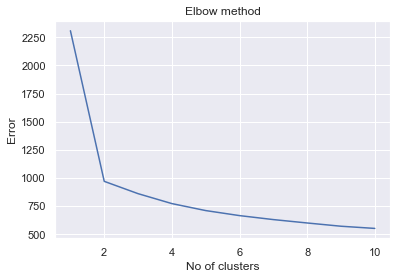

In [37]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(X)
    kmeans.fit(X)
    Error.append(kmeans.inertia_)

plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

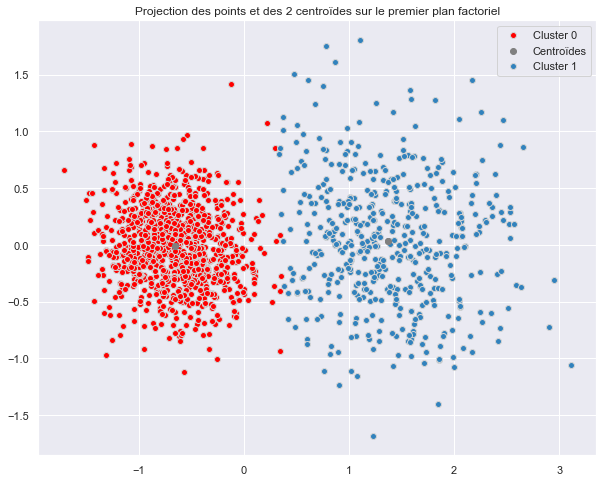

In [38]:
# Nombre de clusters:
n_clust = 2

# Clustering par K-means:
km = KMeans(n_clusters=n_clust,random_state=1994)
x_km = km.fit_transform(df_kmeans[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

# Ajout d'une colonne contenant le cluster attribue:
clusters_km = km.labels_
#Billet_df["cluster_km"] = km.labels_
#Billet_df["cluster_km"] = Billet_df["cluster_km"].apply(str)

centroids_km = km.cluster_centers_

# Clustering par projection des individus sur le premier plan factoriel:
pca_km = decomposition.PCA(n_components=3).fit(df_kmeans[["diagonal","height_left","height_right","margin_low","margin_up","length"]])
acp_km = PCA(n_components=3).fit_transform(df_kmeans[["diagonal","height_left","height_right","margin_low","margin_up","length"]])

centroids_km_projected = pca_km.transform(centroids_km)

# Graphique:
plt.figure(figsize=(10, 8))
colormap = np.array(['red', 'blue'])
for couleur,k in zip(['red', "#3182bd"],[0,1]):
    plt.scatter(acp_km[km.labels_==k,0],acp_km[km.labels_==k,1],c=couleur,edgecolors="#D3D3D3",label="Cluster {}".format(k))
    plt.legend()
    plt.scatter(centroids_km_projected[:,0],centroids_km_projected[:,1],color="grey",label="Centroïdes")
plt.title("Projection des points et des {} centroïdes sur le premier plan factoriel".format(len(centroids_km)))
plt.show()


In [39]:
centroids = centroids_km
pd.DataFrame(centroids, columns=billets_vf[["diagonal","height_left","height_right","margin_low","margin_up","length"]].columns)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.986844,103.951839,103.813579,4.122647,3.058181,113.195329
1,171.898634,104.193126,104.145031,5.241274,3.347909,111.590269


# Matrice de confusion K-Mean

In [40]:
tableau = pd.crosstab(clusters_km,df_kmeans["is_genuine"])
tableau.index = ['Cluster 0 - Vrai','Cluster 1 - Faux']
tableau.columns = ['Faux_billets','Vrai_billets']
tableau

,Faux_billets,Vrai_billets
Cluster 0 - Vrai,19,998
Cluster 1 - Faux,481,2


Text(0.5, 12.5, 'Real label')

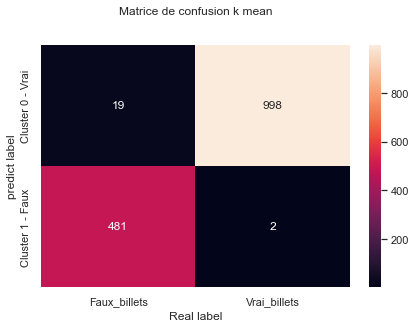

In [41]:
sns.heatmap(tableau, annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion k mean', y=1.1)
plt.ylabel('predict label')
plt.xlabel('Real label')

In [42]:
accuracy=round(((481+997)/1500)*100,2)
precision=round((997/(997+19))*100,2)
recall=round((997/(3+997))*100,2)
vrai_négatif=round((481/500)*100,2)
print("Accuracy:",accuracy)
print("Precision:",precision)
print("Recall:",recall)
print("vrai négatif:",vrai_négatif)

Accuracy: 98.53
Precision: 98.13
Recall: 99.7
vrai négatif: 96.2


# Prédiction avec K-means

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels
from scipy.stats import t, shapiro
import scipy as sp
from sklearn.cluster import KMeans

In [44]:
essai= pd.read_csv("billets_production.csv", sep=';')
essai

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [68]:
km.predict(X)
k_score=pd.Series(km.predict(X))
#k_score=km.predict(X).Transpose
km_predict_result= pd.concat([essai, k_score], axis=1)
km_predict_result.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,id,0
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,1
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,1
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,0


# Réaliser une régression logistique

In [46]:
from statsmodels.api import Logit
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score , roc_curve, accuracy_score , precision_score, recall_score

In [47]:
X=billets_vf.drop(columns=['is_genuine'], axis=1)
y= billets_vf["is_genuine"]
print(y.value_counts())

True     1000
False     500
Name: is_genuine, dtype: int64


# Modèle et Prédiction 

In [48]:
#valeurs caractéristiques et valeur cible
x = billets_vf [['diagonal','height_left','height_right','margin_low','margin_up','length']]
y = billets_vf["is_genuine"]

In [49]:
# Séparation du dataseet en données d'entrainement et données de test
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, 
                                                    random_state=1) 
y_test.size

300

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
reg_logit = linear_model.LogisticRegression()    
reg_logit.fit(x_train, y_train)   
y_pred = reg_logit.predict(x_test) 
   
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(y_test, y_pred)*100) 

Logistic Regression model accuracy(in %): 99.33333333333333


In [51]:
# Nombre de valeur par matrice
print('Nombre de valeurs total y_train :', y_train.count())
print('Nombre de valeurs total y_test :', y_test.count(), '\n')

# Nombre et type de valeur de valeur par matrice
print('Nombre et type de valeur de valeur par matrice :', '\n')
print('y_train :', '\n', y_train.value_counts(), '\n')
print('y_test :', '\n', y_test.value_counts())

Nombre de valeurs total y_train : 1200
Nombre de valeurs total y_test : 300 

Nombre et type de valeur de valeur par matrice : 

y_train : 
 True     798
False    402
Name: is_genuine, dtype: int64 

y_test : 
 True     202
False     98
Name: is_genuine, dtype: int64


In [52]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[ 97,   1],
       [  1, 201]], dtype=int64)

Text(0.5, 12.5, 'Real label')

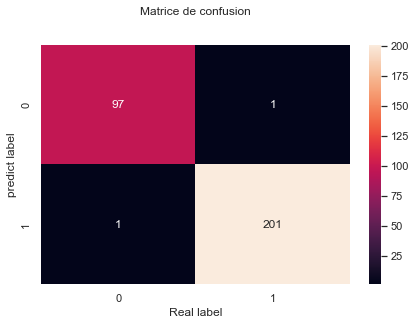

In [53]:
sns.heatmap(cnf_matrix, annot=True,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion', y=1.1)
plt.ylabel('predict label')
plt.xlabel('Real label')

In [54]:
from sklearn.metrics import precision_score, recall_score
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
#print("Score F1:",F1_score(y_test, y_pred))

Accuracy: 0.9933333333333333
Precision: 0.995049504950495
Recall: 0.995049504950495


In [55]:
y_test.value_counts()

True     202
False     98
Name: is_genuine, dtype: int64

# Courbe ROC

In [56]:
from sklearn.metrics import roc_auc_score

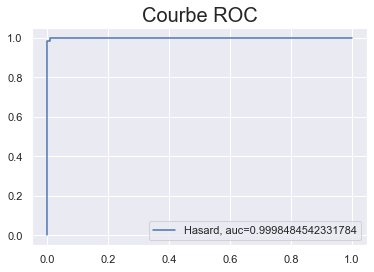

In [57]:
y_pred_proba = reg_logit.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
x = [0,1]
y = [0,1]
plt.plot(fpr,tpr,label="Hasard, auc="+str(auc))
plt.legend(loc=4)
plt.title('Courbe ROC', fontsize=20)
ax.set_ylabel('Taux Vraix Positifs', fontsize=14)
ax.set_xlabel('Taux Faux Positifs', fontsize=14)
plt.show()

# Application du modèle aux données test

In [58]:
clr = LogisticRegression()
clr.fit(x_train, y_train)

LogisticRegression()

In [59]:
essai= pd.read_csv("billets_production.csv", sep=';')
essai

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [60]:
X = essai.iloc[:, :-1]
X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.76,104.01,103.54,5.21,3.30,111.42
1,171.87,104.17,104.13,6.00,3.31,112.09
2,172.00,104.58,104.29,4.99,3.39,111.57
3,172.49,104.55,104.34,4.44,3.03,113.20
4,171.65,103.63,103.56,3.77,3.16,113.33


In [61]:
#Utilisation du modèle de prédiction 'lr'
probability = reg_logit.predict_proba(X.values)[:, 1]

In [62]:
#Probabilités des billets établies 
proba = pd.Series(probability.round(3), name='value')
proba

0    0.005
1    0.001
2    0.001
3    0.911
4    1.000
Name: value, dtype: float64

In [63]:
df = pd.concat([essai, proba], axis=1)
df

,diagonal,height_left,height_right,margin_low,margin_up,length,id,value
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.005
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.001
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.001
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.911
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,1.000


In [64]:
#Résultats de la classification prédictive :
resultat = []
for i in df['value'] >= .5:
    if i is True :
        resultat.append('Vrai Billet')
    else :
        resultat.append('Faux Billet')

df['resultat'] = resultat
df

,diagonal,height_left,height_right,margin_low,margin_up,length,id,value,resultat
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1,0.005,Faux Billet
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2,0.001,Faux Billet
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3,0.001,Faux Billet
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4,0.911,Vrai Billet
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5,1.000,Vrai Billet


In [65]:
for i, k in zip(df['value'],df["id"]):
    if i > 0.5:
        print("Le billet","{}".format(k),"est vrai")
    else:
        print("Le billet","{}".format(k),"est faux")

Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai


In [66]:
import joblib
from joblib import dump, load
dump(reg_logit, 'logit_model_detection.joblib')

['logit_model_detection.joblib']

# Programme de prédiction des billets

In [67]:
#Données de test ou fichier à évaluer
billets_test_df = pd.read_csv("billets_production.csv", sep=';')
x_test = billets_test_df [['diagonal','height_left','height_right','margin_low','margin_up','length']]


logit_model = load('logit_model_detection.joblib')
y_pred = logit_model.predict(x_test) 

billets_test_df["proba"] = logit_model.predict(x_test)
billets_test_df["pred"] = (logit_model.predict(x_test) >= 0.5).astype(int)

# Affichage des resultats:
print("\nIndetification des billets:\n")
for i, k in zip(billets_test_df["pred"],billets_test_df["id"]):
    if i == 1:
        print("Le billet","{}".format(k),"est vrai")
    else:
        print("Le billet","{}".format(k),"est faux")


Indetification des billets:

Le billet A_1 est faux
Le billet A_2 est faux
Le billet A_3 est faux
Le billet A_4 est vrai
Le billet A_5 est vrai
